<a href="https://colab.research.google.com/github/hanlululu/02807-Computational-tools-for-Data-Science/blob/main/Week9/exercises_week_9_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02807 - Week 9 Exercises: Working with SQL

In this exercise session you will get acquainted with SQL, in particular the dialect SQLite which we'll work with using [pandasql](https://pypi.org/project/pandasql/).

We will use [this dataset](https://www.kaggle.com/ahsen1330/us-police-shootings) concerning US police shootings. The content is described as:
> It contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect

The .csv we'll work with is available [here](https://courses.compute.dtu.dk/02807/2021/lectures/week9/shootings.csv).

# Setup

To work with `pandasql`, we first load the data as pandas dataframe, which will automatically detected by `pandasql` when writing queries. This means we can use the `sqldf` function to  query loaded dataframes (with SQLite syntax). 

The queries are therefore similar to any regular SQL table query (where the SQL server is running on some host machine), but executed up against our pandas dataframe.

## Package install and imports

In [ ]:
!pip install pandasql==0.7.3

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import pandasql as psql

## Load data

In [ ]:
df_shootings = pd.read_csv('shootings.csv')
df_shootings.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [ ]:
# Example query up against df_shootings
psql.sqldf("""
SELECT id, 
       date 
  FROM df_shootings 
 LIMIT 2
""")


,id,date
0,3,2015-01-02
1,4,2015-01-02


# Exercise 1: Select, From, Where, Limit, Order by

You should write queries that are well-formatted and thus easy to read by yourself and others. Acquaint yourself with at least the first example in [this article](https://learnsql.com/blog/24-rules-sql-code-formatting-standard/) to get a feel for how you should format your queries.

## List the date of shootings in Vermont (VT)

In [ ]:
# your code goes here
psql.sqldf("""
SELECT date
  FROM df_shootings 
 WHERE state = 'VT'
""")


,date
0,2015-12-22
1,2016-03-21
2,2016-09-16
3,2017-09-01
4,2018-01-16
5,2018-02-11
6,2019-05-11
7,2019-10-01


## List the shootings from Vermont (VT) and determine how many were armed

In [ ]:
# your code goes here
psql.sqldf("""
SELECT *
  FROM df_shootings 
 WHERE state = 'VT'
""")


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,1115,Kenneth Stephens,2015-12-22,shot,gun,56.0,M,White,Burlington,VT,0,attack,Not fleeing,1,Guns
1,1395,"Ralph ""Phil"" Grenon",2016-03-21,shot and Tasered,knife,76.0,M,White,Burlington,VT,1,other,Not fleeing,1,Sharp objects
2,1889,Jesse Beshaw,2016-09-16,shot,unarmed,29.0,M,Native,Winooski,VT,0,other,Foot,1,Unarmed
3,2914,Michael Battles,2017-09-01,shot,toy weapon,32.0,M,White,Poultney,VT,1,attack,Not fleeing,0,Other unusual objects
4,3305,Nathan Giffin,2018-01-16,shot,gun,32.0,M,White,Montpelier,VT,0,undetermined,Foot,0,Guns
5,3396,Benjamin Gregware,2018-02-11,shot,gun,42.0,M,White,Bolton,VT,1,other,Not fleeing,0,Guns
6,4715,Jeremy Potwin,2019-05-11,shot,gun,39.0,M,White,Tunbridge,VT,0,attack,Not fleeing,0,Guns
7,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,White,Rutland,VT,0,attack,Car,0,Guns


## List the shootings in Kansas (KS) where the shot person was either unarmed or carried Other unusual objects (arms_category)

In [ ]:
# your code goes here
psql.sqldf("""
SELECT *
  FROM df_shootings 
 WHERE state = 'KS' 
   AND (arms_category = 'Unarmed' OR 
        arms_category = 'Other unusual objects')
   /* Alt: arms_category IN ('Unarmed', 'Other unusual objects')*/
""")


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,0,other,Not fleeing,0,Unarmed
1,1463,Jeff Robertson,2016-04-14,shot and Tasered,unarmed,54.0,M,White,McPherson,KS,1,attack,Not fleeing,0,Unarmed
2,2028,Kenton Kobza,2016-11-08,shot and Tasered,unarmed,19.0,M,White,Hays,KS,0,attack,Car,0,Unarmed
3,3250,Andrew Finch,2017-12-27,shot,unarmed,28.0,M,White,Wichita,KS,0,other,Not fleeing,0,Unarmed
4,4424,David Michael Bosiljevac,2019-01-28,shot,toy weapon,55.0,M,White,Wichita,KS,0,attack,Not fleeing,0,Other unusual objects


## List the 10 oldest people shot, ordered by age and (in case of age ties) date

In [ ]:
# your code goes here
psql.sqldf("""
  SELECT *
    FROM df_shootings 
ORDER BY age DESC, 
         date DESC
   LIMIT 10
""")

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,2407,Frank W. Wratny,2017-03-08,shot,gun,91.0,M,White,Union Township,PA,0,attack,Not fleeing,0,Guns
1,5609,Lawson Edward Schaber,2020-03-08,shot,gun,84.0,M,White,Apache Junction,AZ,0,attack,Not fleeing,0,Guns
2,4100,Kay Kenniker,2018-10-12,shot,gun,84.0,M,White,Chandler,AZ,1,attack,Not fleeing,0,Guns
3,4252,Amelia Huron-Macias,2018-03-07,shot,unarmed,84.0,F,White,Bexar County,TX,0,other,Not fleeing,0,Unarmed
4,3403,Raymond Bishop,2018-02-12,shot,gun,84.0,M,White,Homestead,FL,1,attack,Not fleeing,0,Guns
5,2095,Quinton Phillips,2016-12-01,shot,gun,83.0,M,White,Dover,AR,0,attack,Not fleeing,0,Guns
6,357,Richard Dale Weaver,2015-04-12,shot,machete,83.0,M,White,Oklahoma City,OK,1,other,Not fleeing,0,Sharp objects
7,2653,Theodore Brendecke,2017-06-09,shot,gun,82.0,M,White,Miami,FL,1,attack,Other,0,Guns
8,1822,Darrel Hetrick,2016-08-27,shot,gun,82.0,M,White,Morgantown,WV,0,attack,Not fleeing,1,Guns
9,3578,Robert Litolff,2018-04-05,shot,gun,81.0,M,White,Greece,NY,0,attack,Not fleeing,0,Guns


# Exercise 2: Group by, Having, Count (and other aggregate functions)

## How many shot were male and how many were female?

In [ ]:
# your code goes here
psql.sqldf("""
  SELECT gender,
         COUNT(*)
    FROM df_shootings 
GROUP BY gender
""")

,gender,COUNT(*)
0,F,222
1,M,4673


## What were the five dates with most shootings and how many were there?

In [ ]:
# your code goes here
psql.sqldf("""
  SELECT date,
         COUNT(*)
    FROM df_shootings 
GROUP BY date
ORDER BY COUNT(*) DESC
LIMIT 5
""")

,date,COUNT(*)
0,2018-06-29,9
1,2018-04-01,9
2,2018-01-06,9
3,2019-12-10,8
4,2019-06-06,8


## Per threat level, what is the average age, minimum age and maximum age of people shot

In [ ]:
# your code goes here
psql.sqldf("""
  SELECT threat_level,
         MIN(age),
         AVG(age), 
         MAX(age)
    FROM df_shootings 
GROUP BY threat_level
""")

,threat_level,MIN(age),AVG(age),MAX(age)
0,attack,14.0,36.953969,91.0
1,other,6.0,36.056366,84.0
2,undetermined,15.0,34.021033,65.0


## What combinations of race and flee method had more than 75 shootings?

In [ ]:
# your code goes here
psql.sqldf("""
  SELECT race,
         flee,
         COUNT(*)
    FROM df_shootings 
GROUP BY race, 
         flee
  HAVING COUNT(*) > 75
ORDER BY flee, race
""")

,race,flee,COUNT(*)
0,Black,Car,218
1,Hispanic,Car,159
2,White,Car,418
3,Black,Foot,255
4,Hispanic,Foot,124
5,White,Foot,231
6,Black,Not fleeing,734
7,Hispanic,Not fleeing,534
8,White,Not fleeing,1657
9,Black,Other,91


## Per race, what is the ratio of people shot who had signs of mental illness? Include also the raw counts used to compute the ratio

You will need to make use of `CAST(<expr> AS FLOAT)` as otherwise your ratio computation will be over integers (and thus 0).

In [ ]:
# your code goes here
psql.sqldf("""
  SELECT race,
         CAST(SUM(signs_of_mental_illness) AS FLOAT) / COUNT(*) AS ratio,
         SUM(signs_of_mental_illness) AS signs_of_mental_illness_count,
         COUNT(*) AS total_count
    FROM df_shootings 
GROUP BY race
ORDER BY ratio DESC
""")

,race,ratio,signs_of_mental_illness_count,total_count
0,White,0.287964,713,2476
1,Asian,0.258065,24,93
2,Other,0.229167,11,48
3,Native,0.179487,14,78
4,Hispanic,0.174058,157,902
5,Black,0.141757,184,1298


## Per year, what is the ratio of people shot who had signs of mental illness? Plot this result with an appropriate type of graph

You may use `STRFTIME` to extract the year from the date. It may be necessary to reshape the dataframe prior to plotting.

In [ ]:
# your code goes here
query46 = psql.sqldf("""
  SELECT STRFTIME('%Y', date) AS year,
         flee,
         CAST(SUM(signs_of_mental_illness) AS FLOAT) / COUNT(*) AS ratio
    FROM df_shootings 
GROUP BY year, flee
ORDER BY year ASC
""")

query46

,year,flee,ratio
0,2015,Car,0.118881
1,2015,Foot,0.148148
2,2015,Not fleeing,0.304790
3,2015,Other,0.120000
4,2016,Car,0.117647
5,2016,Foot,0.076923
6,2016,Not fleeing,0.344123
7,2016,Other,0.062500
8,2017,Car,0.082840
9,2017,Foot,0.131579


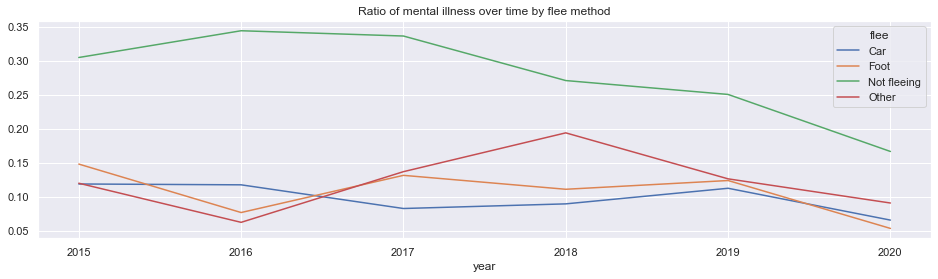

In [ ]:
# your plotting code goes here
ax = query46.pivot_table(index='year', columns='flee', values='ratio') \
            .plot(title='Ratio of mental illness over time by flee method', figsize=(16, 4))

# Exercise 3: With & As, Joins

For this final exercise we'll work with secondary dataframe, the .csv of which you can download [here](https://courses.compute.dtu.dk/02807/2021/lectures/week9/shootings_states.csv). This dataframe contains some auxilliary information about each state, and shares `state` values with `df_shootings`.

In [ ]:
df_states = pd.read_csv('shootings_states.csv')
df_states.dtypes

state         object
state_long    object
region        object
dtype: object

## How many shootings took place per region?

In [ ]:
# your code goes here
psql.sqldf("""
    SELECT region,
           COUNT(*)
      FROM df_shootings 
INNER JOIN df_states ON df_shootings.state = df_states.state
  GROUP BY region
""")

,region,COUNT(*)
0,midwest,808
1,northeast,343
2,south,1897
3,west,1847


## How many shootings took place in states starting with 'New' or 'North' (per state)?

In [ ]:
# your code goes here
psql.sqldf("""
    SELECT state_long,
           COUNT(*)
      FROM df_shootings 
INNER JOIN df_states ON df_shootings.state = df_states.state
     WHERE df_states.state_long LIKE 'New%'
        OR df_states.state_long LIKE 'North%'
  GROUP BY df_states.state
""")

,state_long,COUNT(*)
0,North Carolina,148
1,North Dakota,11
2,New Hampshire,12
3,New Jersey,60
4,New Mexico,93
5,New York,90


## What ten cities in the south region had the highest number of shootings?

In [ ]:
# your code goes here
psql.sqldf("""
    SELECT city,
           df_states.state_long,
           COUNT(*)
      FROM df_shootings 
INNER JOIN df_states USING (state)
     WHERE df_states.region = 'south'
  GROUP BY city
  ORDER BY COUNT(*) DESC
     LIMIT 10
""")

,city,state_long,COUNT(*)
0,Houston,Texas,50
1,San Antonio,Texas,40
2,Jacksonville,Arkansas,31
3,Oklahoma City,Oklahoma,30
4,Austin,Arkansas,28
5,Miami,Florida,26
6,Louisville,Kentucky,22
7,Tulsa,Oklahoma,21
8,Orlando,Florida,20
9,Baltimore,Maryland,19


## Are there more shootings in the first six months or the last six months?

1) This should be achieved with a single query using group by, producing two rows and two columns (number of shootings, whether first or last half of year).

In [ ]:
# your code goes here
psql.sqldf("""
    SELECT COUNT(*),
           CASE 
               WHEN STRFTIME('%m', date) < '07' THEN 'first'
               ELSE 'last'
            END first_or_last
      FROM df_shootings
  GROUP BY first_or_last
""")

,COUNT(*),first_or_last
0,2717,first
1,2178,last


2) This should be achieved with a single query using common table expressions, producing one row and two columns (number of shootings first half, number of shootings second half).

In [ ]:
# your code goes here
psql.sqldf("""
      WITH first_six AS (
          SELECT COUNT(*) AS count,
                 STRFTIME('%m', date) AS month
            FROM df_shootings
           WHERE month < '07'
      ), last_six AS (
          SELECT COUNT(*) AS count,
                 STRFTIME('%m', date) AS month
            FROM df_shootings
           WHERE month >= '07'
      )
    SELECT first_six.count AS first_six_count,
           last_six.count AS last_six_count
      FROM first_six
CROSS JOIN last_six
""")

,first_six_count,last_six_count
0,2717,2178


## Per state, what was the average age in years 2015-2017 and the average age in years 2018-2020? Include only states with more than 40 shootings in both the first and last period.

Make use of CTE's in this query and include the number of shootings for both periods. Make sure to list the states with their long name.

In [ ]:
# your code goes here
psql.sqldf("""
      WITH first_three AS (
         SELECT state,
                COUNT(*) AS count,
                AVG(age) AS avg_age
           FROM df_shootings
          WHERE STRFTIME('%Y', date) IN ('2015', '2016', '2017')
          GROUP BY state
      ), last_three AS (
         SELECT state,
                COUNT(*) AS count,
                AVG(age) AS avg_age
           FROM df_shootings
          WHERE STRFTIME('%Y', date) IN ('2018', '2019', '2020')
          GROUP BY state
      )
    SELECT state_long,
           ROUND(first_three.avg_age, 2) || ' (' || first_three.count || ')' AS '2015 to 2017',
           ROUND(last_three.avg_age, 2) || ' (' || last_three.count || ')' AS '2018 to 2020'
      FROM first_three
INNER JOIN last_three USING (state)
INNER JOIN df_states USING (state)
   WHERE first_three.count > 40 
      AND last_three.count > 40
  ORDER BY state
""")

,state_long,2015 to 2017,2018 to 2020
0,Arizona,35.22 (126),35.64 (96)
1,California,34.44 (452),35.1 (249)
2,Colorado,34.78 (82),36.48 (86)
3,Florida,37.28 (172),39.4 (152)
4,Wyoming,35.44 (78),38.25 (83)
5,Indiana,36.74 (50),40.61 (41)
6,Missouri,35.73 (71),34.68 (53)
7,North Carolina,38.66 (76),39.5 (72)
8,Ohio,35.15 (88),36.14 (58)
9,Oklahoma,39.27 (76),36.66 (75)
